In [15]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [16]:
##---------------DATOS DE ENTRENAMIENTO -------------------------##
##Cargar los datos con extención .mat
x = loadmat('/DatosEntrenamiento2.mat')

##Traernos los datos del archivo .mat que nos interesan
y = x['data_te']

##Convertir los datos en un array de Numpy
z = np.array(y)

##Convertir el Array en un DataFrame de Pandas
df = pd.DataFrame(z)

##Contar el numero de datos nulos del dataFrame
np.count_nonzero(pd.isnull(df) == True)

df.columns = ['uplink_size_mean','uplink_size_median','uplink_size_MAD','uplink_size_STD','uplink_size_Skewness','uplink_size_Kurtosis','uplink_size_MAX','uplink_size_MIN','uplink_size_MeanSquare','downlink_size_mean','downlink_size_median','downlink_size_MAD', 'downlink_size_STD','downlink_size_Skewness','downlink_size_Kurtosis','downlink_size_MAX','downlink_size_MIN','downlink_size_MeanSquare','both_links_size_mean','both_links_size_mean','both_links_size_MAD','both_links_size_STD','both_links_size_Skewness','both_links_size_Kurtosis','both_links_size_MAX','both_links_size_MIN','both_links_size_MeanSquare','uplink_interval_mean','uplink_interval_median','uplink_interval_MAD','uplink_interval_STD','uplink_interval_Skewness','uplink_interval_Kurtosis','uplink_interval_MAX','uplink_interval_MIN','uplink_interval_MeanSquare','downlink_interval_mean','downlink_interval_median','downlink_interval_MAD','downlink_interval_STD','downlink_interval_Skewness','downlink_interval_Kurtosis','downlink_interval_MAX','downlink_interval_MIN','downlink_interval_MeanSquare','both_links_interval_mean','both_links_interval_median','both_links_interval_MAD','both_links_interval_STD','both_links_interval_Skewness','both_links_interval_Kurtosis','both_links_interval_MAX','both_links_interval_MIN','both_links_interval_MeanSquare','Label']
df.sample(8)

,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,downlink_size_mean,downlink_size_median,downlink_size_MAD,downlink_size_STD,downlink_size_Skewness,downlink_size_Kurtosis,downlink_size_MAX,downlink_size_MIN,downlink_size_MeanSquare,both_links_size_mean,both_links_size_mean,both_links_size_MAD,both_links_size_STD,both_links_size_Skewness,both_links_size_Kurtosis,both_links_size_MAX,both_links_size_MIN,both_links_size_MeanSquare,uplink_interval_mean,uplink_interval_median,uplink_interval_MAD,uplink_interval_STD,uplink_interval_Skewness,uplink_interval_Kurtosis,uplink_interval_MAX,uplink_interval_MIN,uplink_interval_MeanSquare,downlink_interval_mean,downlink_interval_median,downlink_interval_MAD,downlink_interval_STD,downlink_interval_Skewness,downlink_interval_Kurtosis,downlink_interval_MAX,downlink_interval_MIN,downlink_interval_MeanSquare,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,Label
4288,0.010442,0.013667,0.002633,0.003350,1.092798,2.689236,0.042356,0.000188,0.016912,113.052632,38.357201,88.0,0.0000,0.791760,1.628107,168.0,86.0,119.057704,0.002157,0.008340,0.000110,0.000160,5.112635,30.799111,0.058828,0.000001,0.008565,1037.296296,658.017371,1474.0,71.1648,-0.742127,1.594859,1562.0,76.0,1226.223858,0.001995,0.006925,0.000019,0.000026,4.131812,19.773015,0.042356,0.000001,0.007174,861.69,694.945499,1450.0,166.0512,-0.186152,1.065518,1562.0,76.0,1104.820985,1.0
13706,0.007133,0.015201,0.003234,0.002092,3.637365,13.989460,0.082840,0.000083,0.016609,229.815800,11.193280,228.0,0.0000,5.686288,31.155820,297.0,228.0,230.081000,0.004445,0.014915,0.000824,0.000636,5.877373,36.913050,0.109220,0.000334,0.015448,1580.290000,238.711800,1676.0,0.0000,-4.323449,19.591310,1676.0,274.0,1597.930000,0.002756,0.009610,0.000458,0.000482,6.295253,43.898280,0.080994,0.000083,0.009951,1067.11,684.967800,1502.0,257.9724,-0.380640,-1.839283,1676.0,228.0,1266.180000,0.0
12838,0.310824,0.712109,0.056260,0.077470,2.309371,3.824403,2.635087,0.000119,0.763824,834.360000,703.428100,288.0,88.9560,0.351124,-1.915543,1676.0,228.0,1082.209000,0.185113,0.542791,0.003741,0.005250,3.413215,11.128060,2.768903,0.000146,0.570054,284.760000,247.392600,228.0,17.7912,4.584765,20.745370,1676.0,216.0,376.132000,0.138835,0.475499,0.002381,0.003199,4.078092,16.495300,2.768903,0.000119,0.493066,422.16,472.133800,228.0,17.7912,2.150864,2.806714,1676.0,216.0,631.585500,0.0
5076,0.014678,0.032397,0.001775,0.002624,2.774631,9.185787,0.117393,0.000006,0.034947,124.333333,41.037275,88.0,2.9652,0.166382,1.028856,168.0,86.0,130.662415,0.004822,0.020827,0.000023,0.000023,5.609929,33.667356,0.133900,0.000002,0.021244,1030.302632,598.779960,1402.0,118.6080,-0.886831,1.880525,1518.0,76.0,1189.682040,0.003664,0.016780,0.000021,0.000021,6.332480,43.047520,0.117393,0.000002,0.017093,812.87,650.563666,1306.0,314.3112,-0.139264,1.074044,1518.0,76.0,1039.114233,1.0
3046,0.013333,0.027199,0.002059,0.003053,3.311355,13.429104,0.119069,0.000005,0.029641,121.473684,40.769499,88.0,2.9652,0.319129,1.102769,168.0,86.0,127.790948,0.003424,0.014361,0.000029,0.000032,7.132748,58.091271,0.121524,0.000002,0.014678,1058.074074,610.829820,1386.0,112.6776,-0.896244,1.928786,1598.0,76.0,1219.847319,0.002774,0.012749,0.000024,0.000025,7.887713,70.967641,0.119069,0.000002,0.012984,880.12,661.948338,1358.0,355.8240,-0.287417,1.158740,1598.0,76.0,1099.274788,1.0
4337,0.010990,0.012850,0.003952,0.004958,0.702552,1.695547,0.032795,0.000008,0.016675,117.904762,40.350842,88.0,0.0000,0.476652,1.248883,168.0,76.0,124.306840,0.003021,0.007498,0.000206,0.000299,2.907770,10.360027,0.032454,0.000002,0.008040,928.949367,685.769844,1442.0,142.3296,-0.404385,1.204169,1598.0,76.0,1152.073909,0.002387,0.006763,0.000037,

In [17]:
YEntrenamiento = df['Label']
XEntrenamiento = scaler.fit_transform(df.drop(['Label'],axis=1))

In [18]:
!pip install scikit-plot

In [19]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt 
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [20]:
def experimentar(X,Y,oversampling=False):
    Folds = 10
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X[train,:]
        Ytrain = Y[train]
        Xtest = X[test, :]
        Ytest = Y[test]
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7, store_covariance=True,
                              tol=0.0001)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       781
         1.0       0.95      1.00      0.97       787

    accuracy                           0.97      1568
   macro avg       0.97      0.97      0.97      1568
weighted avg       0.97      0.97      0.97      1568



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,1.0,0.0,0.973752,0.003214


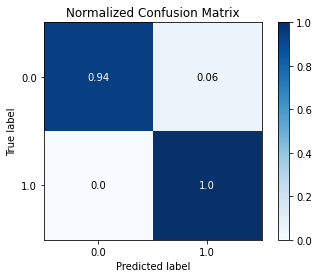

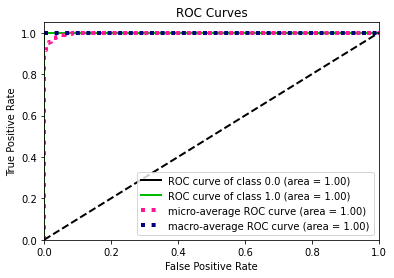

In [21]:
experimentar(XEntrenamiento,YEntrenamiento,False)